In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
rc = pd.read_csv("adult.csv")
rc

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
rc.head() # df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
rc["workclass"].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [5]:
rc["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [6]:
rc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
rc.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


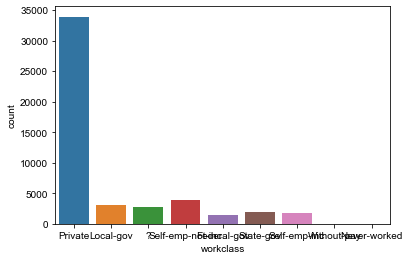

In [8]:
sns.countplot(rc["workclass"])
sns.set(rc={'figure.figsize':(12,10)})


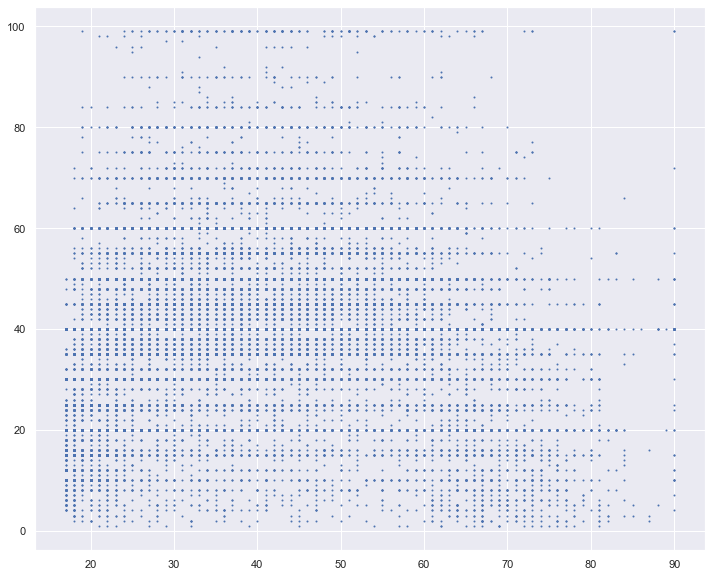

In [9]:
plt.scatter(rc["age"],rc["hours-per-week"],s=1)

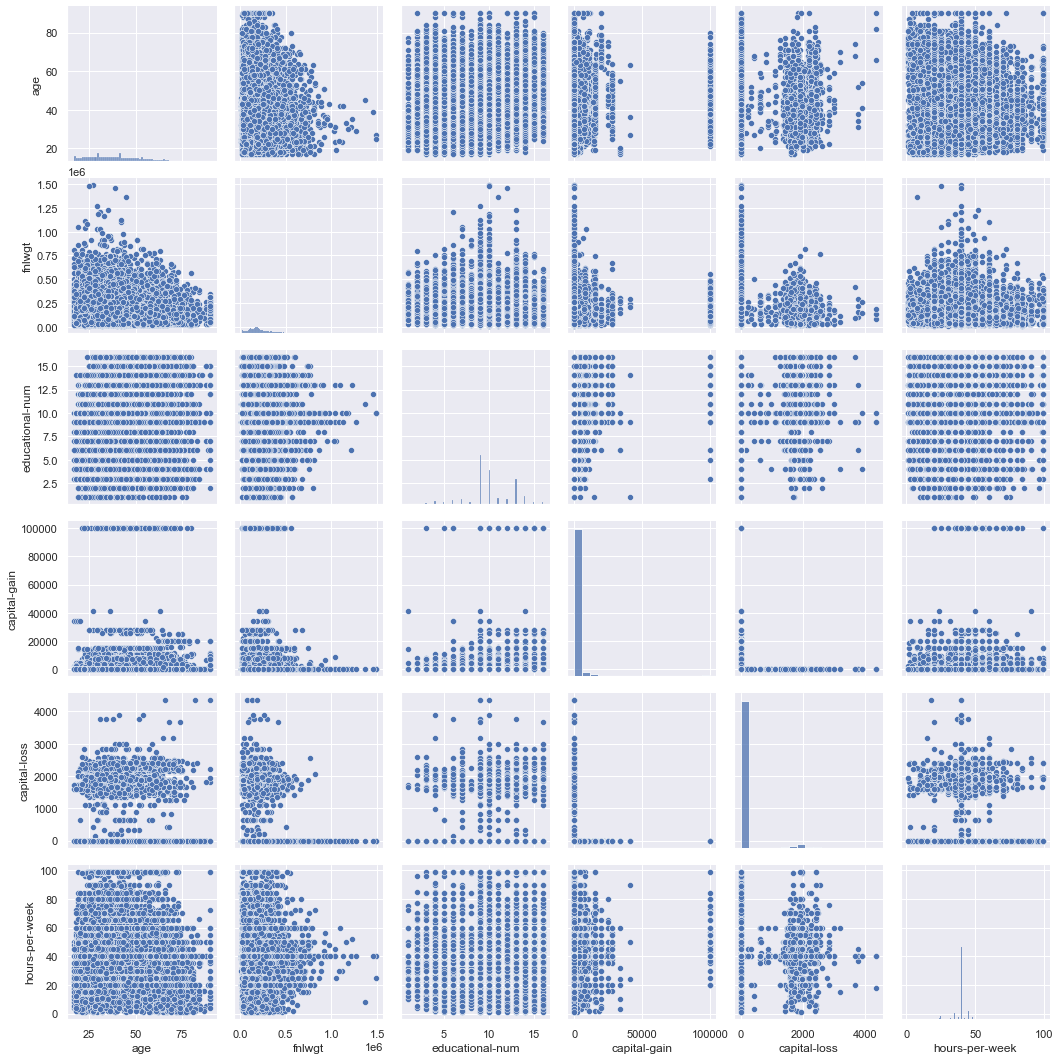

In [10]:
sns.pairplot(rc)
sns.set(rc={'figure.figsize':(12,10)})

In [11]:
rc.corr() #co-relations

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [12]:
rc["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [13]:
for a in rc.columns:
    for i in range(len(rc[a])):
        if rc[a][i] =="?":
            rc[a][i] = np.nan     #cleaning data as ? symbol may create problems
            

C:\Users\hp\AppData\Local\Temp/ipykernel_5064/1385208931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc[a][i] = np.nan     #cleaning data as ? symbol may create problems


In [14]:
rc.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [15]:
rc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [16]:
rc.isna().sum()  #isna-> na->not available

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [17]:
rc.dropna(axis=0,inplace = True)

In [18]:
# rows reduced to 45222 from 48842
rc.reset_index(drop = True)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
45218,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
45219,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
45220,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
rc.isna().sum() 

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [20]:
rc.groupby("workclass").count()

,age,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
workclass,,,,,,,,,,,,,,
Federal-gov,1406,1406,1406,1406,1406,1406,1406,1406,1406,1406,1406,1406,1406,1406
Local-gov,3100,3100,3100,3100,3100,3100,3100,3100,3100,3100,3100,3100,3100,3100
Private,33307,33307,33307,33307,33307,33307,33307,33307,33307,33307,33307,33307,33307,33307
Self-emp-inc,1646,1646,1646,1646,1646,1646,1646,1646,1646,1646,1646,1646,1646,1646
Self-emp-not-inc,3796,3796,3796,3796,3796,3796,3796,3796,3796,3796,3796,3796,3796,3796
State-gov,1946,1946,1946,1946,1946,1946,1946,1946,1946,1946,1946,1946,1946,1946
Without-pay,21,21,21,21,21,21,21,21,21,21,21,21,21,21


In [21]:
rc.groupby("workclass").mean()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
workclass,,,,,,
Federal-gov,42.593172,183752.510669,10.901849,924.485064,109.179943,41.433144
Local-gov,41.651290,190138.732581,11.026774,766.129032,102.701290,40.865484
Private,36.889633,192616.517429,9.866725,886.123127,80.611223,40.258925
Self-emp-inc,45.804374,178892.302552,11.184690,5053.619077,166.142770,48.578372
Self-emp-not-inc,45.367229,175085.025026,10.207587,1800.606955,109.260801,44.429136
State-gov,39.530319,182073.107400,11.350976,750.135149,81.989209,39.121788
Without-pay,47.285714,167902.666667,8.952381,325.238095,89.857143,33.952381


In [22]:
rc.groupby("gender").mean()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
gender,,,,,,
Female,36.984757,185587.268255,10.105886,588.132290,61.480095,36.932902
Male,39.300423,191731.229666,10.124513,1348.520294,101.648115,42.865987


In [23]:
pd.crosstab(rc["workclass"],rc["gender"])

gender,Female,Male
workclass,,
Federal-gov,445,961
Local-gov,1244,1856
Private,11428,21879
Self-emp-inc,199,1447
Self-emp-not-inc,617,3179
State-gov,755,1191
Without-pay,7,14


<AxesSubplot:>

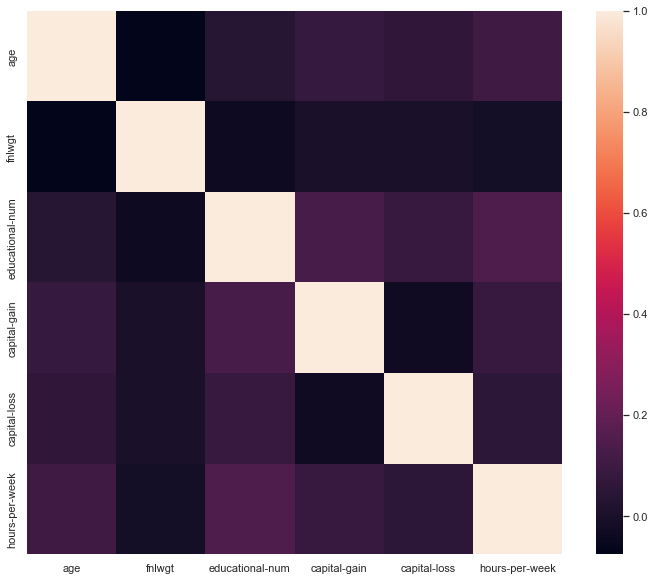

In [24]:
sns.heatmap(rc.corr())

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()


In [27]:
#ex 
le.fit(rc["workclass"])
le.transform(rc["workclass"])

array([2, 2, 1, ..., 2, 2, 3])

In [28]:
cat_cols =["workclass","education", "marital-status","occupation","relationship","race","gender","native-country","income"]

In [29]:
for c in cat_cols:
    le = LabelEncoder()
    rc[c] = le.fit_transform(rc[c])

In [30]:
rc

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
48838,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
48839,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
48840,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [31]:
# x y split   y = f(x)   #preprocessing

In [32]:
X= rc.drop("income", axis =1)
y= rc["income"]

In [33]:
#test train split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test , y_train, y_test = train_test_split(X,y,test_size=0.3,random_state =4)

In [36]:
x_train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
23723,24,2,180060,7,12,4,2,1,4,1,2354,0,40,38
19330,39,3,122742,7,12,2,3,0,4,1,15024,0,55,38
2356,59,2,249814,11,9,5,7,1,4,0,0,0,37,38
47366,42,1,318046,1,7,2,13,0,4,1,0,0,40,38
27017,30,2,243190,14,15,2,9,0,1,1,0,0,20,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25253,55,1,28151,11,9,0,0,1,4,0,0,0,40,38
12812,20,2,143604,15,10,4,11,4,4,0,0,0,2,38
29252,17,2,218124,1,7,4,11,3,4,0,0,0,20,38
9046,46,2,215895,12,14,4,3,1,4,1,4787,0,60,38


In [37]:
# to rectify high variation in values lets bound them
# or say normalisation

In [38]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [39]:
#fit on the training data and transform both 

In [40]:
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [41]:
x_train.shape

(31655, 14)

In [42]:
x_train

array([[0.09589041, 0.33333333, 0.11321814, ..., 0.        , 0.39795918,
        0.95      ],
       [0.30136986, 0.5       , 0.07425845, ..., 0.        , 0.55102041,
        0.95      ],
       [0.57534247, 0.33333333, 0.16063072, ..., 0.        , 0.36734694,
        0.95      ],
       ...,
       [0.        , 0.33333333, 0.13909067, ..., 0.        , 0.19387755,
        0.95      ],
       [0.39726027, 0.33333333, 0.13757559, ..., 0.        , 0.60204082,
        0.95      ],
       [0.4109589 , 0.33333333, 0.09651696, ..., 0.        , 0.55102041,
        0.95      ]])

## KNN

<span style="color:red">--- note--- all the criteria, parameters and methods are available on skikit learn official documentation(site)</span>


In [43]:
 from sklearn.neighbors import KNeighborsClassifier

In [44]:
model = KNeighborsClassifier(n_neighbors = 3)

In [45]:
model = model.fit(x_train, y_train)

In [46]:
y_pred = model.predict(x_test)

In [47]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     10223
           1       0.63      0.57      0.60      3344

    accuracy                           0.81     13567
   macro avg       0.75      0.73      0.74     13567
weighted avg       0.81      0.81      0.81     13567



In [50]:
# or

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.810864597921427
0.5726674641148325


## logistic regression


In [51]:
 from sklearn.linear_model import LogisticRegression

In [52]:
model = LogisticRegression()

In [53]:
model = model.fit(x_train, y_train)

In [54]:
y_pred = model.predict(x_test)

In [55]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     10223
           1       0.72      0.46      0.56      3344

    accuracy                           0.82     13567
   macro avg       0.78      0.70      0.73     13567
weighted avg       0.81      0.82      0.81     13567



#### naive bayes algo

In [58]:
 from sklearn.naive_bayes import GaussianNB
    

In [59]:
model = GaussianNB()

In [60]:
model = model.fit(x_train, y_train)

In [61]:
y_pred = model.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     10223
           1       0.66      0.33      0.44      3344

    accuracy                           0.79     13567
   macro avg       0.74      0.64      0.65     13567
weighted avg       0.77      0.79      0.77     13567



# decision tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
model = DecisionTreeClassifier(random_state=3)

In [83]:
model = model.fit(x_train, y_train)

In [84]:
y_pred = model.predict(x_test)

In [85]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     10223
           1       0.60      0.63      0.62      3344

    accuracy                           0.81     13567
   macro avg       0.74      0.75      0.74     13567
weighted avg       0.81      0.81      0.81     13567



# random forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth =5, random_state = 0)

In [72]:
model = model.fit(x_train, y_train)

In [73]:
y_pred = model.predict(x_test)

In [74]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     10223
           1       0.79      0.51      0.62      3344

    accuracy                           0.85     13567
   macro avg       0.82      0.73      0.76     13567
weighted avg       0.84      0.85      0.83     13567

